## Contruyendo un Clasificador de Imágenes usando la API Sequential

In [1]:
from tensorflow import keras

### Cargamos los datos de entrenamiento y validación

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

### Conjunto de validación

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

En fashion MNIST necesitamos la lista de las clases de nombres para saber con qué estamos tratando

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[y_train[0]]

'Coat'

### Creando un modelo usando la API Sequential

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Si el modelo se incrementa podemos definir las capas directamente como una lista de capas:

In [ ]:
model = model.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

En código de producción importar la librería keras.layers directamente:

In [26]:
from keras import models
from keras.layers import Flatten, Dense

In [9]:
model = models.Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

Visualizamos el resumen de las capas y sus parámetros:

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.utils import plot_model

In [29]:
plot_model(model)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [11]:
model.layers

In [12]:
layer_names = [model.layers[i].name for i in range(len(model.layers))]
layer_names

['flatten_1', 'dense_2', 'dense_3', 'dense_4']

Obtenemos los valores de los pesos y bias:

In [13]:
weights, biases = model.layers[1].get_weights()

In [37]:
weights

array([[ 0.06557606,  0.03506866, -0.01076353, ..., -0.03525826,
        -0.01779838,  0.03398869],
       [ 0.06782515, -0.00575125,  0.0617196 , ...,  0.01554989,
        -0.06736333, -0.04712074],
       [ 0.04219532, -0.00296852, -0.01848597, ..., -0.01129074,
         0.02913482,  0.04948018],
       ...,
       [ 0.05680402, -0.03732681,  0.04935056, ...,  0.00434244,
         0.02747615,  0.00429036],
       [ 0.0067189 , -0.04761803, -0.02904753, ..., -0.05026074,
         0.02352954,  0.04347062],
       [-0.0426271 ,  0.07424116,  0.07018884, ...,  0.01268336,
        -0.0070879 , -0.01738068]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [38]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [69]:
biases.shape

(300,)

### Compilar en Modelo

In [41]:
"""
    keras.losses.sparse_categorical_crossentropy
    keras.optimizer.SGD()
    keras.metrics.sparse_categorical_accuracy
"""

'\n    keras.losses.sparse_categorical_crossentropy\n    keras.optimizer.SGD()\n    keras.metrics.sparse_categorical_accuracy\n'

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Ajustar el Modelo

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.7197 - accuracy: 0.7634 - val_loss: 0.5246 - val_accuracy: 0.8200
Epoch 2/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4894 - accuracy: 0.8297 - val_loss: 0.4567 - val_accuracy: 0.8478
Epoch 3/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4471 - accuracy: 0.8440 - val_loss: 0.4297 - val_accuracy: 0.8572
Epoch 4/30
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4187 - accuracy: 0.8551 - val_loss: 0.4107 - val_accuracy: 0.8588
Epoch 5/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.3988 - accuracy: 0.8599 - val_loss: 0.4123 - val_accuracy: 0.8558
Epoch 6/30
55000/55000 [==============================] - 5s 100us/sample - loss: 0.3815 - accuracy: 0.8664 - val_loss: 0.4035 - val_accuracy: 0.8590
Epoch 7/30
55000/55000 [============================

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

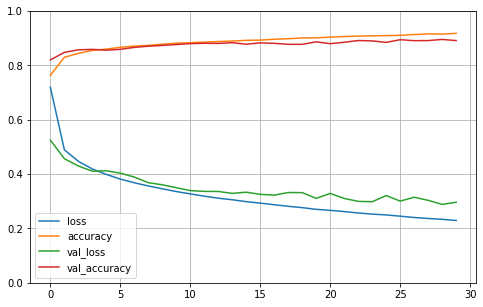

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluar el Modelo

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/sample - loss: 71.8858 - accuracy: 0.8384


[71.88584657863379, 0.8384]

### Haciendo Predicciones

In [20]:
X_new = X_test[:3]

In [21]:
y_prob = model.predict(X_new)

In [22]:
y_prob.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

El modelo ha predicho con un seguridad del 100% para este caso que las prendas son las mostradas en el array.